In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('attrition.csv')

In [5]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
Y = data["Attrition"]

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data_transformed = data.apply(le.fit_transform)
data_transformed.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


In [8]:
X = data_transformed[["Age","BusinessTravel","DistanceFromHome","Education","Gender","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MonthlyRate","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]

Y = data_transformed["Attrition"]

In [9]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

enc = preprocessing.OneHotEncoder()
enc.fit(X)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [10]:
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

(1470, 1703)

In [11]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
Y = np.array(Y)

In [13]:
x_train = onehotlabels[:int(0.80*len(X))]
x_test = onehotlabels[int(0.80*len(X)):]

In [14]:
y_train = Y[:int(0.80*len(Y))]
y_test = Y[int(0.80*len(Y)):]

In [15]:
%load_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

In [33]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(120, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(15, activation=tf.nn.relu))

# model.add(tf.keras.layers.Dense(15, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [34]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
model.fit(x_train,y_train, epochs=10,callbacks=[tensorboard_callback])

Epoch 1/10
1176/1176 [==============================] - 0s 171us/sample - loss: 1.0504 - acc: 0.7934
Epoch 2/10
1176/1176 [==============================] - 0s 131us/sample - loss: 0.4367 - acc: 0.8359
Epoch 3/10
1176/1176 [==============================] - 0s 114us/sample - loss: 0.3247 - acc: 0.8469
Epoch 4/10
1176/1176 [==============================] - 0s 119us/sample - loss: 0.2087 - acc: 0.9133
Epoch 5/10
1176/1176 [==============================] - 0s 113us/sample - loss: 1.7940 - acc: 0.9039
Epoch 6/10
1176/1176 [==============================] - 0s 110us/sample - loss: 2.6919 - acc: 0.8359
Epoch 7/10
1176/1176 [==============================] - 0s 102us/sample - loss: 2.6919 - acc: 0.8359
Epoch 8/10
1176/1176 [==============================] - 0s 113us/sample - loss: 2.6919 - acc: 0.8359
Epoch 9/10
1176/1176 [==============================] - 0s 109us/sample - loss: 2.6919 - acc: 0.8359
Epoch 10/10
1176/1176 [==============================] - 0s 125us/sample - loss: 2.6919 - a

In [38]:
model.save('attrition.model')
new_model = tf.keras.models.load_model('attrition.model')

In [39]:
predictions = new_model.predict(x_test)

In [40]:
oneD_predictions = [np.argmax(x) for x in predictions]

In [41]:
import sklearn
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test, oneD_predictions)

0.8537414965986394

In [24]:
oneD_predictions

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Using TensorFlow backend.


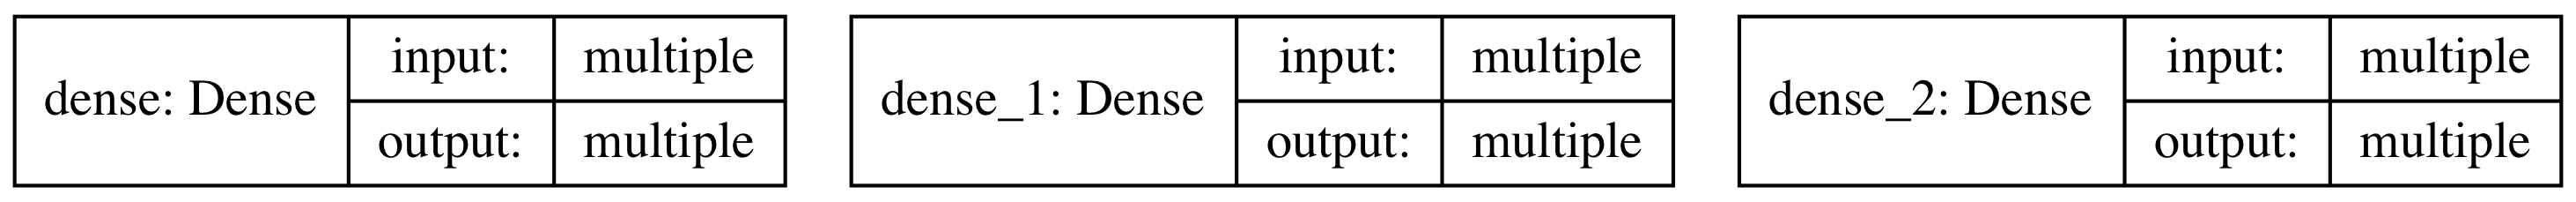

In [25]:
import keras
keras.utils.plot_model(
    new_model, to_file='model.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=300
)

In [26]:
%tensorboard --logdir logs